# Image Classifier Project

The aim of the project is:

- Model the data using an ANN.
- Analyze the results and optimize the model.


------------------------------------------------------------------------------

In [2]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1. Defining paths for dog and cat images:


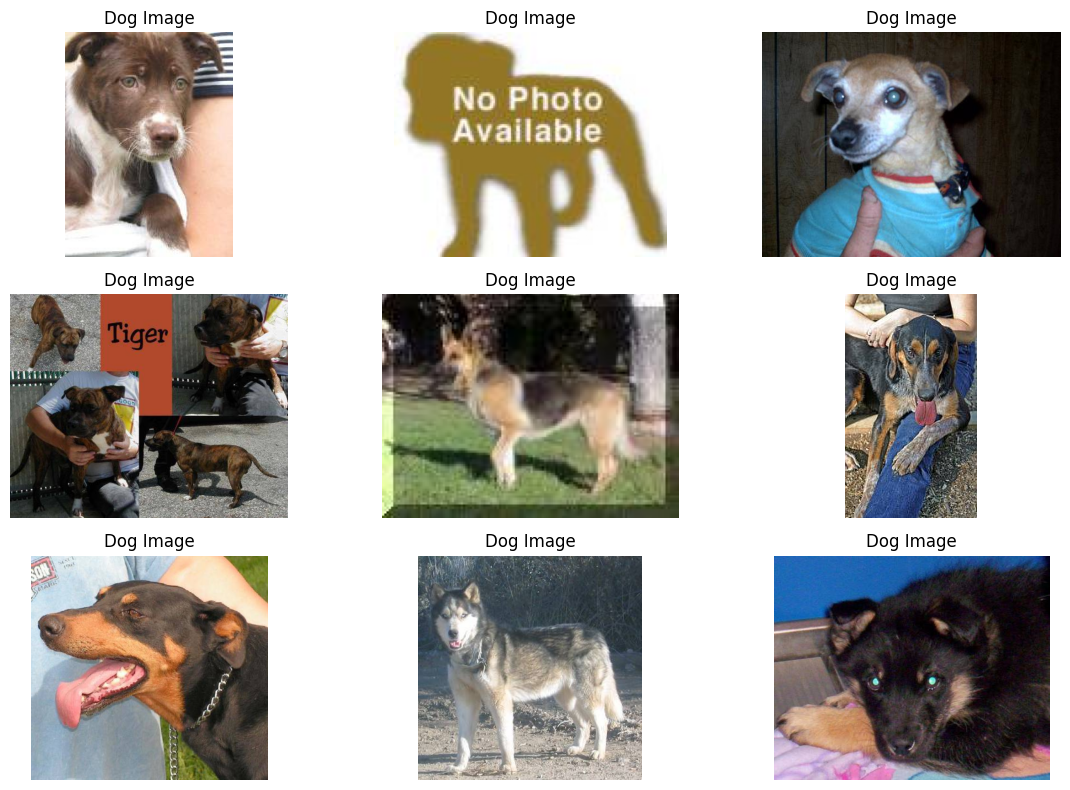

In [ ]:
data_dir = "/workspaces/Image-Classifier-Project_FGM/data/raw/train"
dog_subfolder = os.path.join(data_dir, "dog")

def load_and_display_images(folder, title):
    # Get the first 9 images
    image_files = os.listdir(folder)[:9]
    images = []

    for img_file in image_files:
        img_path = os.path.join(folder, img_file)
        img = image.load_img(img_path)  # Load image
        img_array = image.img_to_array(img) / 255.0  # Normalize
        images.append(img_array)

    # Plot images in a grid
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"{title} Image")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display dog and cat images
load_and_display_images(dog_subfolder, "Dog")

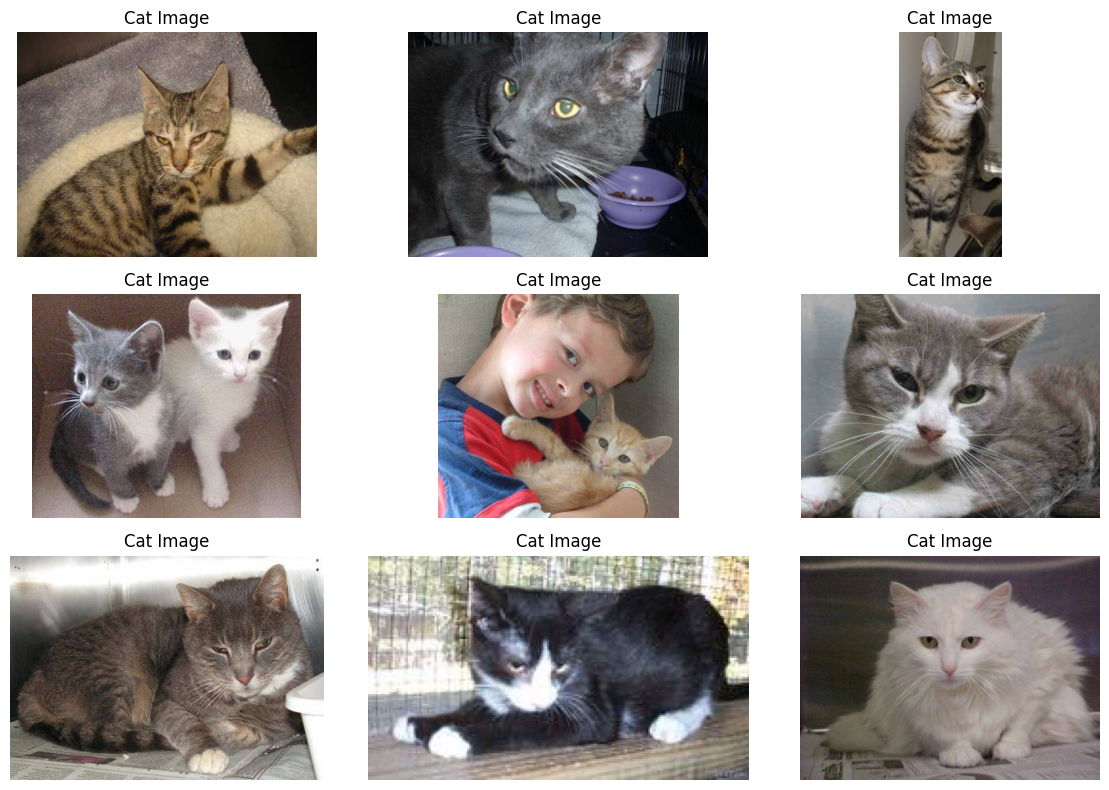

In [ ]:
data_dir = "/workspaces/Image-Classifier-Project_FGM/data/raw/train/cat"
cat_subfolder = os.path.join(data_dir, "cat")

def load_and_display_images(folder, title):
    # Get the first 9 images
    image_files = os.listdir(folder)[:9]
    images = []

    for img_file in image_files:
        img_path = os.path.join(folder, img_file)
        img = image.load_img(img_path)  # Load image
        img_array = image.img_to_array(img) / 255.0  # Normalize
        images.append(img_array)

    # Plot images in a grid
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"{title} Image")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display cat images
load_and_display_images(cat_subfolder, "Cat")

2. Creating a **data generator** for training with augmentation:

In [5]:

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,    # Randomly rotate images up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,       # Apply random shearing transformations
    zoom_range=0.2,        # Apply random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode="nearest"    # Fill in gaps when transforming
)

# Create a data generator for testing (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

The ImageDataGenerator class helps with data augmentation and normalization.

- Augmentation is applied only to the training dataset to improve generalization.
- The testing dataset is only normalized (rescale=1.0 / 255.0) for evaluation.


3.  Loading and preprocessing the dataset for **training and testing** our deep learning model:

In [6]:
# Path to dataset

train_dir = "/workspaces/Image-Classifier-Project_FGM/data/raw/train"
test_dir = "/workspaces/Image-Classifier-Project_FGM/data/raw/test"

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,            # Path to training data
    target_size=(200, 200),  # Resize images to 150x150 pixels
    batch_size=32,           # Load 32 images per batch
    class_mode='binary'      # Use 'binary' for 2 classes; 'categorical' for >2 classes
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,             # Path to testing data
    target_size=(200, 200),  # Resize images to 150x150 pixels
    batch_size=32,           # Load 32 images per batch
    class_mode='binary'      # Use 'binary' for 2 classes; 'categorical' for >2 classes
    )

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [7]:
# Example: Access the first batch of training data
batch_images, batch_labels = next(train_generator)

print("Batch image shape:", batch_images.shape)  # (32, 200, 200, 3)
print("Batch labels:", batch_labels)  # Labels for the batch

Batch image shape: (32, 200, 200, 3)
Batch labels: [1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0.]


4. Defining, compiling, and training our **Convolutional Neural Network (CNN)** for binary image classification:

In [9]:
# Define a simple example model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 543s 693ms/step - accuracy: 0.5866 - loss: 1.5271 - val_accuracy: 0.3010 - val_loss: 1.0965
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 539s 690ms/step - accuracy: 0.6444 - loss: 0.6313 - val_accuracy: 0.4795 - val_loss: 1.0557
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 541s 691ms/step - accuracy: 0.6723 - loss: 0.6077 - val_accuracy: 0.3670 - val_loss: 1.4898
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 538s 687ms/step - accuracy: 0.6740 - loss: 0.6006 - val_accuracy: 0.4311 - val_loss: 1.3096
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 541s 692ms/step - accuracy: 0.6872 - loss: 0.5916 - val_accuracy: 0.5883 - val_loss: 0.9102
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 542s 693ms/step - accuracy: 0.6913 - loss: 0.5844 - val_accuracy: 0.5154 - val_loss: 1.1254
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 582s 744ms/step - accuracy: 0.6916 - loss: 0.5780 - val_accuracy: 0.4345 - val_loss: 1.2217
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 578s 738ms/step - accuracy: 0.7030 -

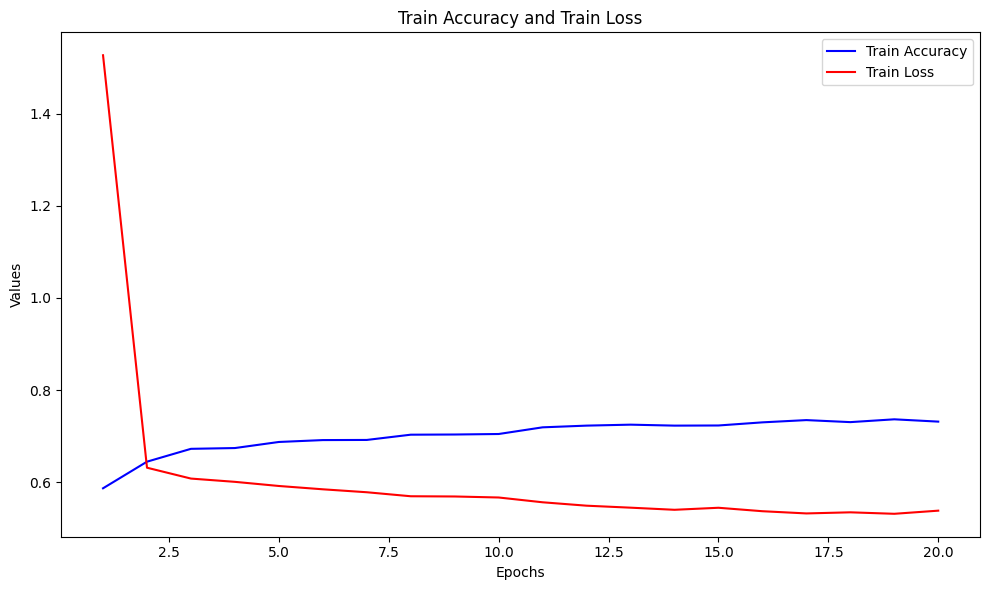

In [5]:
import matplotlib.pyplot as plt

# Manually input the accuracy and loss data for training and validation across epochs
train_accuracy = [0.5866, 0.6444, 0.6723, 0.6740, 0.6872, 0.6913, 0.6916, 0.7030, 0.7034, 0.7045, 
                  0.7190, 0.7227, 0.7248, 0.7227, 0.7230, 0.7298, 0.7347, 0.7303, 0.7364, 0.7314]
train_loss = [1.5271, 0.6313, 0.6077, 0.6006, 0.5916, 0.5844, 0.5780, 0.5693, 0.5688, 0.5666, 
              0.5562, 0.5488, 0.5445, 0.5399, 0.5443, 0.5368, 0.5320, 0.5344, 0.5312, 0.5380]

# Plot train accuracy and train loss on the same graph
plt.figure(figsize=(10, 6))

# Plot train accuracy
plt.plot(range(1, 21), train_accuracy, label='Train Accuracy', color='blue')

# Plot train loss
plt.plot(range(1, 21), train_loss, label='Train Loss', color='red')

# Add titles and labels
plt.title('Train Accuracy and Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

5. Evaluate the **Best Model on the Test Set** and saving the model:


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint(
    filepath="../models/binary_classifier.keras",  # Save the model in the specified location
    monitor="val_accuracy",                     # Monitor validation accuracy
    verbose=1,                                  # Print messages when saving
    save_best_only=True,                        # Save only the best model
    save_weights_only=False,                    # Save the entire model (not just weights)
    mode="auto"                                 # Automatically infer direction for optimization
)

early_stopping = EarlyStopping(
    monitor="val_accuracy",                     # Monitor validation accuracy
    patience=3,                                 # Stop training after 3 epochs with no improvement
    verbose=1,                                  # Print messages about stopping
    mode="auto"                                 # Automatically infer direction for optimization
)

# Train the model using the generators and callbacks
history = model.fit(
    train_generator,
    epochs=3,                                  # Train for 3 epochs
    validation_data=test_generator,             # Use the test generator for validation
    callbacks=[checkpoint, early_stopping]      # Include callbacks
)

# Print final training results
print("Training completed. The best model has been saved as 'binary_classifier.keras'.")


Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.7419 - loss: 0.5207
Epoch 1: val_accuracy improved from -inf to 0.51472, saving model to ../models/binary_classifier.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 534s 682ms/step - accuracy: 0.7419 - loss: 0.5207 - val_accuracy: 0.5147 - val_loss: 1.3056
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.7374 - loss: 0.5218
Epoch 2: val_accuracy improved from 0.51472 to 0.60024, saving model to ../models/binary_classifier.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 550s 699ms/step - accuracy: 0.7374 - loss: 0.5218 - val_accuracy: 0.6002 - val_loss: 1.2588
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.7398 - loss: 0.5219
Epoch 3: val_accuracy did not improve from 0.60024
782/782 ━━━━━━━━━━━━━━━━━━━━ 532s 679ms/step - accuracy: 0.7398 - loss: 0.5219 - val_accuracy: 0.5353 - val_loss: 1.2571
Training completed. The best model has been saved as 'binary_classifier.keras'.


6. Plotting Training Results: Visualizing the training and validation **accuracy and loss over epochs**.

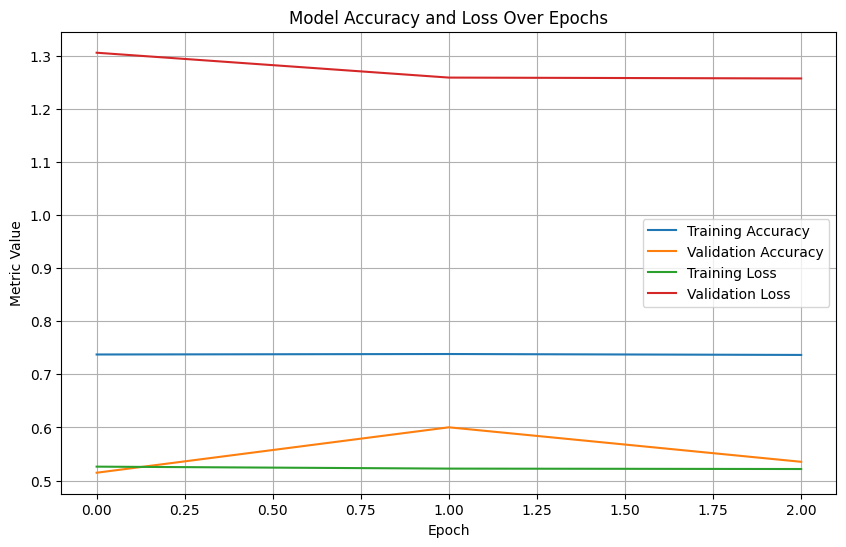

In [21]:
import matplotlib.pyplot as plt

# Plot the Results
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(history.history["accuracy"], label="Training Accuracy")      # Training accuracy
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")  # Validation accuracy
plt.plot(history.history["loss"], label="Training Loss")              # Training loss
plt.plot(history.history["val_loss"], label="Validation Loss")        # Validation loss

# Configure the Plot Layout
plt.title("Model Accuracy and Loss Over Epochs")
plt.ylabel("Metric Value")
plt.xlabel("Epoch")
plt.legend(loc="best")  # Automatically position the legend
plt.grid(True)          # Add a grid for better readability

# Display the Plot
plt.show()

6. Making Predictions: At this stage the model will be perfectly designed to make predictions on a single image, ensuring it matches the input size expected by the model, and uses the model to predict the class. The example assumes a binary classification task, in our case "dog" nad "cat":


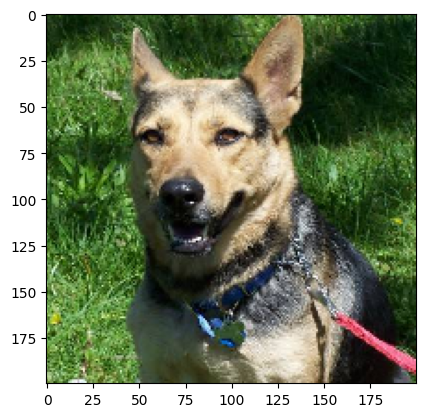

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class: Class 1 (Positive - We have identified a dog)


In [7]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = "/workspaces/Image-Classifier-Project_FGM/data/raw/test/test/42.jpg"  
img = image.load_img(img_path, target_size=(200, 200))                           
img_array = np.asarray(img)                                                      
plt.imshow(img)                                                                  
plt.axis('on')                                                                  
plt.show()

# Preprocess the image for prediction
img_array = img_array / 255.0                           # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension

# Load the saved model
saved_model = load_model("/workspaces/Image-Classifier-Project_FGM/models/binary_classifier.keras") 

# Predict the class
output = saved_model.predict(img_array)
threshold = 0.5  # Binary classification threshold
if output[0][0] > threshold:
    print("Predicted class: Class 1 (Positive - We have identified a dog)")  # Replace with your class label
else:
    print("Predicted class: Class 0 (Negative - We have identified a cat)")  # Replace with your class label

# Conclusions

The model distinguishes perfectly between two classes using the sigmoid activation (binary classification). Sucess!!⭐🏆